In [ ]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [6]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as n

In [12]:
w = ['NORMAL', 0.25, 0.025]
P = ['NORMAL', 10.2, 1.12]
Fy = ['NORMAL', 40.3, 4.64]
POP = [10000]

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 1,
        'D': 3,
        'VARS': [w, P, Fy],
        'MODEL': 'MCS'}

In [13]:
def OBJ(X):
    w = X[0]
    P = X[1]
    Fy = X[2]
    

    # STATE LIMIT FUNCTION
    
    R_0 = 80 * Fy
    S_0 = 54 * P + 5832 * w
    G_0 = S_0 - R_0

    R = [R_0] 
    S = [S_0] 
    G = [G_0]


    return R, S, G

In [14]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [15]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,0.270140,10.236145,32.425446,2594.035699,2128.207333,-465.828366,0.0
1,0.256170,12.551301,39.541318,3163.305449,2171.756110,-991.549340,0.0
2,0.247581,10.647450,37.619566,3009.565266,2018.857419,-990.707848,0.0
3,0.283718,10.704818,35.346717,2827.737349,2232.706242,-595.031108,0.0
4,0.248217,9.518946,44.448118,3555.849408,1961.626111,-1594.223296,0.0
...,...,...,...,...,...,...,...
9995,0.236104,9.020226,39.842835,3187.426819,1864.052707,-1323.374112,0.0
9996,0.251300,10.803425,31.956518,2556.521450,2048.968599,-507.552851,0.0
9997,0.239057,10.611252,39.714220,3177.137626,1967.187451,-1209.950175,0.0
9998,0.268105,12.085393,41.329567,3306.365382,2216.198666,-1090.166716,0.0


In [16]:
RESULTS_TEST

[{'TOTAL RESULTS':            X_0        X_1        X_2          R_0          S_0          G_0  \
  0     0.270140  10.236145  32.425446  2594.035699  2128.207333  -465.828366   
  1     0.256170  12.551301  39.541318  3163.305449  2171.756110  -991.549340   
  2     0.247581  10.647450  37.619566  3009.565266  2018.857419  -990.707848   
  3     0.283718  10.704818  35.346717  2827.737349  2232.706242  -595.031108   
  4     0.248217   9.518946  44.448118  3555.849408  1961.626111 -1594.223296   
  ...        ...        ...        ...          ...          ...          ...   
  9995  0.236104   9.020226  39.842835  3187.426819  1864.052707 -1323.374112   
  9996  0.251300  10.803425  31.956518  2556.521450  2048.968599  -507.552851   
  9997  0.239057  10.611252  39.714220  3177.137626  1967.187451 -1209.950175   
  9998  0.268105  12.085393  41.329567  3306.365382  2216.198666 -1090.166716   
  9999  0.228182  10.025755  40.270174  3221.613953  1872.146715 -1349.467238   
  
        

In [7]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,R_1,S_0,S_1,G_0,G_1,I_0,I_1
0,513.707078,1056.267626,3.202133,3.202133,3.522347,2.406683,2.527017,-0.795450,-0.995330,0.0,0.0
1,481.055354,1046.518223,2.604854,2.604854,2.865340,2.281661,2.395744,-0.323193,-0.469596,0.0,0.0
2,510.486998,887.354287,2.928548,2.928548,3.221403,2.319188,2.435148,-0.609360,-0.786255,0.0,0.0
3,588.336309,674.714506,2.885305,2.885305,3.173835,2.550164,2.677672,-0.335141,-0.496163,0.0,0.0
4,692.835320,1045.342861,2.657040,2.657040,2.922744,3.085352,3.239619,0.428312,0.316875,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,526.583634,1062.954521,2.427595,2.427595,2.670355,2.457653,2.580536,0.030058,-0.089819,1.0,0.0
96,679.164211,886.337718,3.394900,3.394900,3.734390,2.976656,3.125489,-0.418244,-0.608901,0.0,0.0
97,509.333257,933.036854,2.982221,2.982221,3.280443,2.334190,2.450899,-0.648031,-0.829544,0.0,0.0
98,507.494485,1044.911849,2.970409,2.970409,3.267450,2.378253,2.497166,-0.592156,-0.770284,0.0,0.0


In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$x_0$ - $P_X (lb)$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['R_0'], bins=50, label='a', alpha=0.5)
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['S_0'], bins=50, label='b', alpha=0.5)

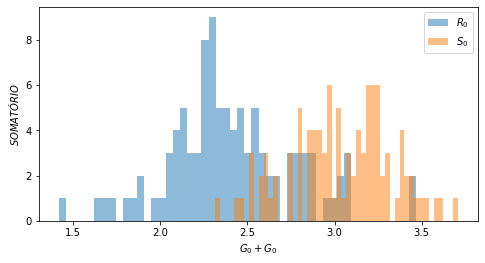

In [8]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$G_0 + G_0$',
                    'Y AXIS LABEL': '$SOMATÓRIO$',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)